## For Colab only
We need to clone the repo here before we can use it

In [1]:
!git init
!git remote add origin "https://github.com/karan-sarkar/VGGVox-PyTorch.git" 
!git pull origin master
!git branch --set-upstream-to=origin/master master

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 342 (delta 145), reused 172 (delta 72), pack-reused 93
Receiving objects: 100% (342/342), 65.48 MiB | 31.66 MiB/s, done.
Resolving deltas: 100% (194/194), done.
From https://github.com/karan-sarkar/VGGVox-PyTorch
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
Branch 'master' set up to track remote branch 'master' from 'origin'.


In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 329 kB 12.4 MB/s 
     |████████████████████████████████| 523 kB 36.9 MB/s 
     |████████████████████████████████| 57 kB 5.9 MB/s 
     |████████████████████████████████| 132 kB 70.5 MB/s 
     |████████████████████████████████| 829 kB 45.9 MB/s 
     |████████████████████████████████| 596 kB 62.6 MB/s 
     |████████████████████████████████| 1.1 MB 60.4 MB/s 
     |████████████████████████████████| 192 kB 70.9 MB/s 
     |████████████████████████████████| 271 kB 63.9 MB/s 
     |████████████████████████████████| 160 kB 61.0 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=0bbcbd619dfabb7dbf75be00dd709f69b383a92e12dd4fb000f2f9c026fcddd6
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled 

Download dataset from gdrive. The specified file is just a minimal copy of the dataset. You can upload a different file and change the ID to your file.

In [3]:
!gdown --id '19q3G3XWKCkjwzdAWf8E-Ntx_hG-shRxo' -O data/wav.zip
!unzip ./data/wav.zip -d ./data/ && mv ./data/subset ./data/wav

Streaming output truncated to the last 5000 lines.
  inflating: ./data/subset/id11130/F8zXHQZ_VyA/00010.wav  
  inflating: ./data/subset/id11130/F8zXHQZ_VyA/00013.wav  
  inflating: ./data/subset/id11130/F8zXHQZ_VyA/00011.wav  
   creating: ./data/subset/id11130/FEam3q144yc/
  inflating: ./data/subset/id11130/FEam3q144yc/00001.wav  
   creating: ./data/subset/id11130/YSNOW9_jlSY/
  inflating: ./data/subset/id11130/YSNOW9_jlSY/00006.wav  
  inflating: ./data/subset/id11130/YSNOW9_jlSY/00005.wav  
  inflating: ./data/subset/id11130/YSNOW9_jlSY/00001.wav  
  inflating: ./data/subset/id11130/YSNOW9_jlSY/00002.wav  
  inflating: ./data/subset/id11130/YSNOW9_jlSY/00003.wav  
  inflating: ./data/subset/id11130/YSNOW9_jlSY/00004.wav  
   creating: ./data/subset/id11130/RNKUA8EGl20/
  inflating: ./data/subset/id11130/RNKUA8EGl20/00006.wav  
  inflating: ./data/subset/id11130/RNKUA8EGl20/00005.wav  
  inflating: ./data/subset/id11130/RNKUA8EGl20/00015.wav  
  inflating: ./data/subset/id11130/RNK

In [4]:
data_dir = "./data"

## Start

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import sys
import pandas as pd
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sys.path.append(os.path.abspath('..'))
from train_fsl import Experiment

In [7]:
try: data_dir
except: data_dir = "/Users/pi/repos/gatech/8803-LS/Project/dataset/voxceleb2"


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [20]:
#@title Set training params { run: "auto" }
# batch_size = 5 #@param {type:"integer"}
num_way = 5 #@param {type:"integer"}
num_shot = 5 #@param {type:"integer"}
num_query =  5#@param {type:"integer"}
num_epochs = 20 #@param {type:"integer"}
num_workers =  2#@param {type:"integer"}
num_train_tasks = 20 #@param {type:"integer"}
num_val_tasks = 5 #@param {type:"integer"}
num_eval_tasks = 5 #@param {type:"integer"}
augmentation = "spec" #@param ["spec", "mixup", "none"]
backbone_arch = "resnet18" #@param ["resnet18", "resnet34", "audionet"]
fsl_arch = "relation-net" #@param ["relation-net", "proto-net"]


In [21]:
experiment = Experiment(
    num_workers=num_workers, 
    device=device,
    num_way=num_way,
    num_shot=num_shot,
    num_query=num_query,
    num_train_tasks=num_train_tasks,
    num_val_tasks=num_val_tasks,
    num_eval_tasks=num_eval_tasks,
    num_epochs=num_epochs,
    augmentation=augmentation,
    backbone_arch=backbone_arch,
    fsl_arch=fsl_arch,
    dir=data_dir,
)

ts [SpecAugment()]
Sequential(
  (0): ExpandChannels()
  (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (5): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (r

In [22]:
loaders = experiment.Dataloaders
batch = next(iter(loaders['train']))

In [23]:
batch[0].shape

torch.Size([25, 1, 512, 300])

Train
The range of samples is : 45 -> 489


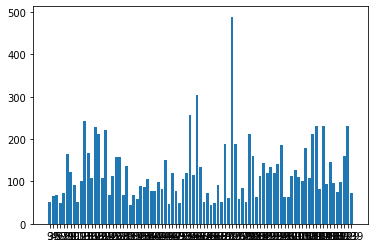

Val
The range of samples is : 52 -> 589


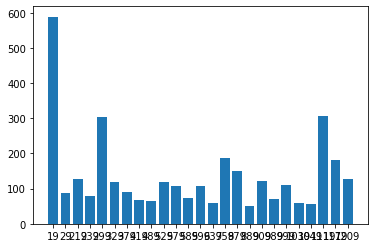

Test
The range of samples is : 55 -> 307


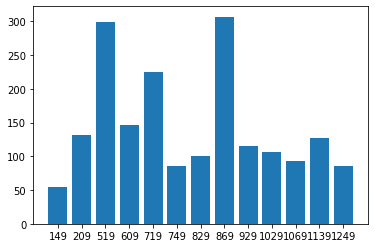

[None]

In [25]:
def plot_freq(dataset):
    labels = np.array(dataset.labels)
    classes, counts = np.unique(labels, return_counts=True)
    print('The range of samples is :', min(counts), '->', max(counts))
    classes = list(map(str, classes))
    _ = plt.bar(classes, counts)
    plt.show()
print('Train')
plot_freq(loaders['train'].dataset)
print('Val')
[plot_freq(dl.dataset) for dl in loaders['val']]
print('Test')
[plot_freq(dl.dataset) for dl in loaders['test']]

In [26]:
train_classes = loaders['train'].dataset.labels
val_classes = loaders['val'][0].dataset.labels
test_classes = loaders['test'][0].dataset.labels
print('The 3 datasets should not have any intersection')
print('Train-Val intersection:', set(train_classes).intersection(set(val_classes)))
print('Val-Test intersection:', set(test_classes).intersection(set(val_classes)))
print('Train-Test intersection:', set(train_classes).intersection(set(test_classes)))

The 3 datasets should not have any intersection
Train-Val intersection: set()
Val-Test intersection: set()
Train-Test intersection: set()


In [ ]:
experiment.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Missing logger folder: /content/lightning_logs

  | Name       | Type                  | Params
-----------------------------------------------------
0 | model      | RelationNetworksMixup | 18.3 M
1 | accuracy   | Accuracy              | 0     
2 | transforms | Sequential            | 0     
-----------------------------------------------------
18.3 M    Trainable params
0         Non-trainable params
18.3 M    Total params
73.046    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/data.py:60: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 25. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  "Trying to infer the `batch_size` from an ambiguous collection. The batch size we"
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/data_loading.py:408: UserWarning: The number of training samples (20) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  f"The number of training samples ({self.num_training_batches}) is smaller than the logging interval"


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]